# <a name="0">kaggle Credit Card Dataset Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Clustring </a>
5. <a href="#5">Training datasets</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_kernels
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from gap_statistic import OptimalK
import pickle
import scipy.cluster.hierarchy as shc
warnings.filterwarnings("ignore")

In [2]:
# !pip install gap-stat

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [3]:
#read the data

data_path = r"C:\Users\Omar\Downloads\Mach2\Projct\CCGENERAL.csv"  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# feel free to investigate what you want
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Customer ID should not be a part of the data to be analyzied<br>
2- Deal with NAN values <br>
3- Deal with skewed features          <br>

In [8]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

The customer ID does not describe the customers, as it is just a value to identify the customers but it is not a meaningful property of the customer data. Because of that we need to drop this feature to not interfere with our analysis.

In [9]:
#solution
df_copy.drop("CUST_ID", axis=1, inplace=True)

In [10]:
#test 
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


After excluding the customer ID feature, I delved into examining the correlation among the remaining numerical features. The correlation map brought to light a strong link between the "one-time purchases" and "purchases" features. Intriguingly, a closer look at the impact of removing one of these highly correlated features revealed a reduction in the number of clusters. This reduction stemmed from the removal of the interactive influence between the eliminated feature and other traits.

Consequently, I opted to proceed with analyzing the data using the complete set of characteristics. However, I'm open to the possibility of conducting another analysis with certain features excluded, should the advice from a domain expert indicate that some of the features influencing clustering are not significant

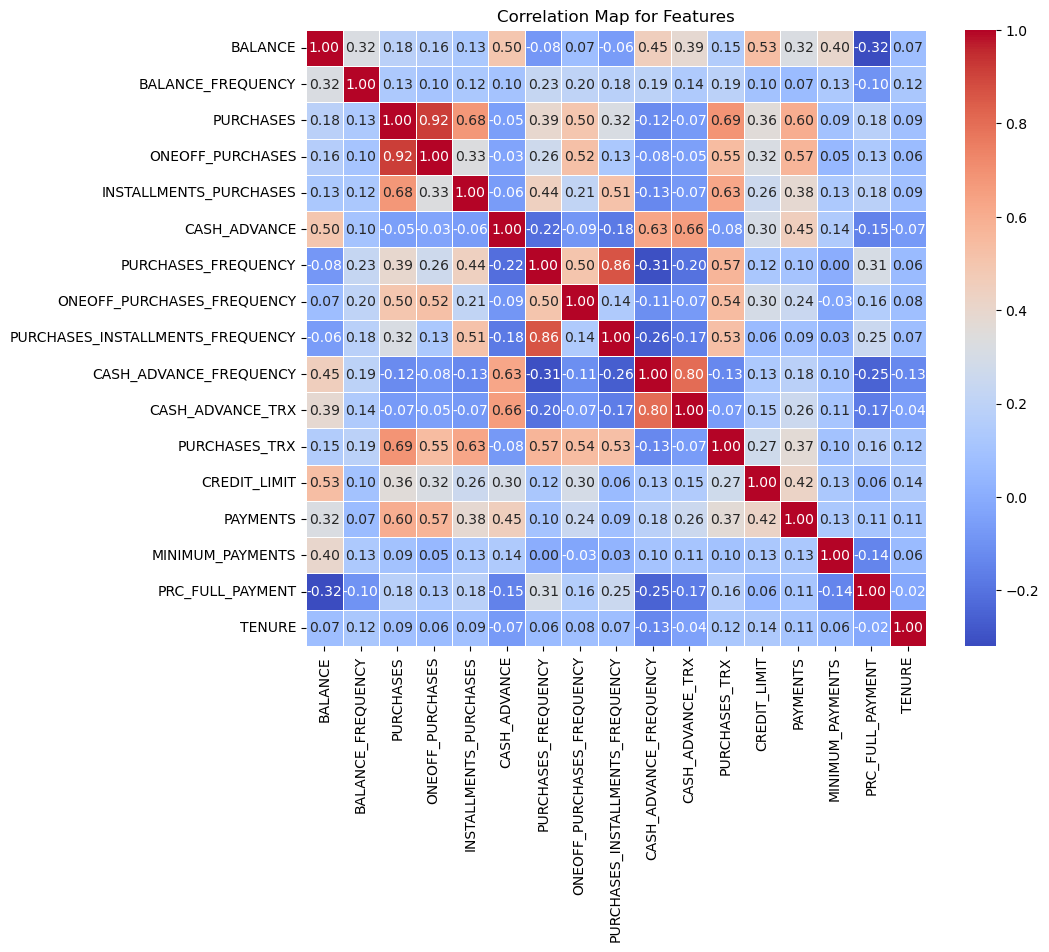

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map for Features')
plt.show()

**Second issue**

The second challenge revolved around dealing with null values in the minimum payments and credit limit features. While exploring the option of replacing these null values with numerical values, it became apparent that this approach was not feasible. Consequently, the decision was made to address this issue by removing the records that contained null values in these specific features.

In [12]:
#solution 
df_copy = df_copy[df_copy["MINIMUM_PAYMENTS"].notnull()]
# df_copy[["PURCHASES","PAYMENTS","MINIMUM_PAYMENTS"]].head(30)


In [13]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8637 non-null   float64
 1   BALANCE_FREQUENCY                 8637 non-null   float64
 2   PURCHASES                         8637 non-null   float64
 3   ONEOFF_PURCHASES                  8637 non-null   float64
 4   INSTALLMENTS_PURCHASES            8637 non-null   float64
 5   CASH_ADVANCE                      8637 non-null   float64
 6   PURCHASES_FREQUENCY               8637 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8637 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8637 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8637 non-null   float64
 10  CASH_ADVANCE_TRX                  8637 non-null   int64  
 11  PURCHASES_TRX                     8637 non-null   int64  
 12  CREDIT_LIMI

In [14]:
#solution
df_copy = df_copy[df_copy["CREDIT_LIMIT"].notnull()]

In [15]:
# test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

**Third Issue**

The third challenge arose from the rightward skewness in some of the features. To tackle this issue, a solution was found in applying a log transform to these specific features.

In [16]:
# issue
df_copy.skew()

BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64

In [17]:
#Solution
df_normalized =df_copy.copy()
#df_normalized.drop("ONEOFF_PURCHASES", axis=1, inplace=True)
transformer = FunctionTransformer(np.log1p, validate=True)
df_normalized['ONEOFF_PURCHASES'] =transformer.transform(df_normalized['ONEOFF_PURCHASES'].values.reshape((-1,1)))
df_normalized['BALANCE'] = transformer.transform(df_normalized['BALANCE'].values.reshape((-1,1)))
df_normalized['PURCHASES'] = transformer.transform(df_normalized['PURCHASES'].values.reshape((-1,1)))
df_normalized['INSTALLMENTS_PURCHASES'] = transformer.transform(df_normalized['INSTALLMENTS_PURCHASES'].values.reshape((-1,1)))
df_normalized['CASH_ADVANCE'] = transformer.transform(df_normalized['CASH_ADVANCE'].values.reshape((-1,1)))
df_normalized['CASH_ADVANCE_FREQUENCY'] = transformer.transform(df_normalized['CASH_ADVANCE_FREQUENCY'].values.reshape((-1,1)))
df_normalized['CASH_ADVANCE_TRX'] = transformer.transform(df_normalized['CASH_ADVANCE_TRX'].values.reshape((-1,1)))
df_normalized['PURCHASES_TRX'] = transformer.transform(df_normalized['PURCHASES_TRX'].values.reshape((-1,1)))
df_normalized['CREDIT_LIMIT'] = transformer.transform(df_normalized['CREDIT_LIMIT'].values.reshape((-1,1)))
df_normalized['PAYMENTS'] = transformer.transform(df_normalized['PAYMENTS'].values.reshape((-1,1)))                      
df_normalized['MINIMUM_PAYMENTS'] = transformer.transform(df_normalized['MINIMUM_PAYMENTS'].values.reshape((-1,1)))    
df_normalized['PRC_FULL_PAYMENT'] = transformer.transform(df_normalized['PRC_FULL_PAYMENT'].values.reshape((-1,1)))  

In [18]:
#test
pd.DataFrame(df_normalized).skew()

BALANCE                            -0.776004
BALANCE_FREQUENCY                  -2.084161
PURCHASES                          -0.777688
ONEOFF_PURCHASES                    0.168420
INSTALLMENTS_PURCHASES             -0.042157
CASH_ADVANCE                        0.248169
PURCHASES_FREQUENCY                 0.033041
ONEOFF_PURCHASES_FREQUENCY          1.504234
PURCHASES_INSTALLMENTS_FREQUENCY    0.487753
CASH_ADVANCE_FREQUENCY              1.425892
CASH_ADVANCE_TRX                    0.920619
PURCHASES_TRX                       0.009795
CREDIT_LIMIT                       -0.106402
PAYMENTS                           -0.050354
MINIMUM_PAYMENTS                    0.251524
PRC_FULL_PAYMENT                    1.690590
TENURE                             -3.011141
dtype: float64

## 4. <a name="4">Clustring</a>
(<a href="#4">Go to top</a>)

In this section, we utilized a range of clustering algorithms, including Kernel K-means, K-means, DBSCAN, and Gaussian Mixture Model, to categorize the data. Additionally, we applied the t-SNE algorithm to visualize the clusters generated by each method. Subsequently, we delved into the identified clusters to discern their unique characteristics. To further our analysis, we employed Principal Component Analysis (PCA) to investigate its influence on the clustering of the data.

In [25]:


# X is your data
# range_of_clusters is the range of cluster numbers you want to try
def ClusturVSsilhouetteScores(X,range_of_clusters):
    silhouette_scores = []

    for n_clusters in range_of_clusters:
        # Fit the k-means model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)

        # Compute the silhouette score
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    # Find the optimal number of clusters
    optimal_k = range_of_clusters[np.argmax(silhouette_scores)]

    print(f"Optimal number of clusters: {optimal_k}")
    plt.plot(range_of_clusters, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.show()


In [26]:
def elbowMethodK(df_normalized):    
    inertia = []


    for i in range(1, 30):
        kmeans = KMeans(n_clusters=i, n_init="auto").fit(df_normalized)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, 30), inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

In [27]:
def kmeansPlt(df_normalized,n_clusters):
    optKmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df_normalized)
    silhouette_max = silhouette_score(df_normalized, optKmeans.labels_)
    # why random state gives me different solutions 
    for i in range(50):
        kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df_normalized)
        silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
        # print(silhouette_avg)
        if silhouette_avg >silhouette_max:
            optKmeans = kmeans
            silhouette_max = silhouette_avg


    # pca = PCA(n_components=2)
    # df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])


    # df_pca['cluster'] = kmeans.labels_
    

    # plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='plasma', marker='o', edgecolors='w')
    # plt.title('KMeans Clustering')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')


    # plt.show()
    return optKmeans

In [28]:




def kernelKmeans(df_normalized,n_clusters,gamma=0.01):
    # Compute the RBF kernel matrix
    kernel_matrix = pairwise_kernels(df_normalized, metric='rbf', gamma=gamma)

    optKmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(kernel_matrix)
    silhouette_max = silhouette_score(df_normalized, optKmeans.labels_)
    
    for i in range(50):
    # Fit KMeans model with the kernel matrix
        kmeans_kernel = KMeans(n_clusters=n_clusters, n_init="auto").fit(kernel_matrix)
        silhouette_avg = silhouette_score(df_normalized, kmeans_kernel.labels_)
        # print(silhouette_avg)
        if silhouette_avg >silhouette_max:
            optKmeans = kmeans_kernel
            silhouette_max = silhouette_avg

    # Reduce the dimensionality for visualization (using PCA)
    # pca = PCA(n_components=2)
    # df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])

    # # Add cluster labels to the DataFrame
    # df_pca['cluster'] = kmeans_kernel.labels_

    # Plot the clusters
    # plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', marker='o', edgecolors='w')
    # plt.title('Kernel KMeans Clustering')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.show()
    return optKmeans

In [29]:


def k_distancePlot(df_normalized,n_neighbors=10):
    # Assuming 'df_normalized' is your normalized DataFrame

    # Use Nearest Neighbors to calculate distances
    neigh = NearestNeighbors(n_neighbors=n_neighbors)  # Adjust the number of neighbors as needed
    neigh.fit(df_normalized)
    distances, indices = neigh.kneighbors(df_normalized)

    # Sort the distances
    distances = np.sort(distances[:, n_neighbors-1])  # Choose the appropriate index for the k-th nearest neighbor

    # Plot the k-distance graph
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points (sorted)')
    plt.ylabel('Distance to 4th Nearest Neighbor')  # Adjust the number accordingly
    plt.show()

    # Use KneeLocator to find the "knee" or optimal value for eps
    kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    optimal_eps = kneedle.elbow_y

    print(f"Optimal eps value: {optimal_eps}")

In [30]:



def DBSCANPlt(df_normalized,eps=2.820054546540241,min_samples=10):
    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df_normalized)

    # Reduce the dimensionality for visualization (using PCA)
    pca = PCA(n_components=2)
    df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])

    # Add cluster labels to the DataFrame
    df_pca['cluster'] = clustering.labels_

    # Plot the clusters
    # plt.figure(figsize=(10, 7))

    # # Plot points with noise in black
    # plt.scatter(df_pca['PC1'][df_pca['cluster'] == -1], df_pca['PC2'][df_pca['cluster'] == -1],
    #             color='black', marker='x', label='Noise')

    # # Plot points with clusters in different colors
    # for cluster_label in set(clustering.labels_):
    #     if cluster_label != -1:
    #         print(cluster_label)
    #         plt.scatter(df_pca['PC1'][df_pca['cluster'] == cluster_label],
    #                     df_pca['PC2'][df_pca['cluster'] == cluster_label],
    #                     label=f'Cluster {cluster_label}')

    # plt.title('DBSCAN Clustering')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.legend()
    # plt.show()
    return clustering

In [31]:

tsne = TSNE(init='pca',n_components=2, perplexity=35,learning_rate=0.1,n_iter=5000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_normalized), columns=['Dimension 1', 'Dimension 2'])
# Assuming 'df_normalized' is your normalized DataFrame
def tsnePlt(df_tsne, labels):
    

    # Visualize the result
    plt.figure(figsize=(10, 7))

    # Assuming you have labels or cluster assignments in 'clustering.labels_'
    # Replace 'clustering.labels_' with the actual cluster assignments if available
    plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=labels, cmap='viridis', marker='o', edgecolors='w')

    plt.title('t-SNE Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()


In [32]:
def GaussianMixturePlt(df_normalized,n_components):
    optKGaussian = GaussianMixture(n_components=n_components).fit(df_normalized)
    silhouette_max = silhouette_score(df_normalized, optKGaussian.predict(df_normalized))
    
    for i in range(50):
    # Fit KMeans model with the kernel matrix
        gm = GaussianMixture(n_components=n_components).fit(df_normalized)
        silhouette_avg = silhouette_score(df_normalized, gm.predict(df_normalized))
        # print(silhouette_avg)
        if silhouette_avg >silhouette_max:
            optKGaussian = gm
            silhouette_max=silhouette_avg
    
    
    # Reduce dimensionality using PCA to 2 components
    # pca = PCA(n_components=2)
    # df_pca = pca.fit_transform(df_normalized)

    # # Predict cluster labels
    # labels = optKGaussian.predict(df_normalized)

    # Create a scatter plot
    # plt.figure(figsize=(10, 6))
    # sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis', s=50)
    # plt.title('GMM Clustering (PCA)')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.show()
    return optKGaussian

The provided code utilizes graph statistics to hint the most suitable number of clusters.

In [77]:

# X is your data

# Create a range of cluster numbers you want to try
cluster_range = range(1, 11)

# Generate reference data
reference_data = np.random.rand(*df_normalized.shape)

# Specify the number of Monte Carlo simulations
n_simulations = 1000

# Use the OptimalK class from the gap_statistic package
optimal_k = OptimalK(parallel_backend='joblib',n_jobs=1)

# Compute optimal k
optimal_k(df_normalized, cluster_array=cluster_range, n_refs=n_simulations)  # The reference_data argument is not needed here

# Get the optimal number of clusters
n_clusters = optimal_k.gap_df["gap_value"].idxmax() + 1

print(f"Optimal number of clusters: {n_clusters}")


Optimal number of clusters: 9


The following code employs the silhouette average method to identify the optimal number of clusters.

Optimal number of clusters: 7


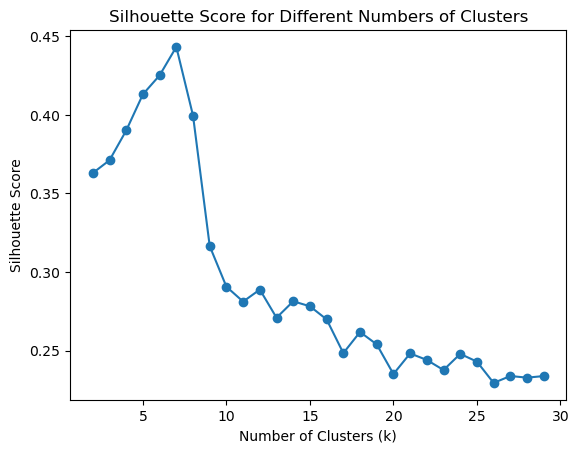

In [34]:
ClusturVSsilhouetteScores(df_normalized,range(2,30))

The elbow method, corroborated by the silhouette average, indicates that the optimal number of clusters is arround 7.

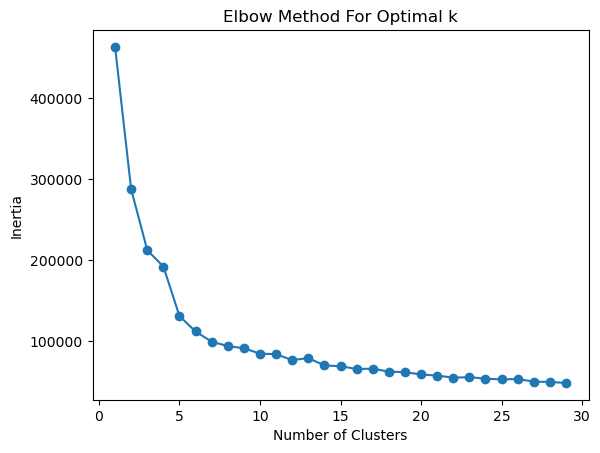

In [35]:
elbowMethodK(df_normalized)

In [36]:
KMeansClassifier=kmeansPlt(df_normalized,n_clusters=7)

In [37]:
silhouette_score(df_normalized,KMeansClassifier.labels_)

0.44322153145508086

In [38]:
kernelKmeansClassifier=kernelKmeans(df_normalized,7,gamma=0.01)

In [39]:
silhouette_score(df_normalized,kernelKmeansClassifier.labels_)

0.43897887249759404

In [40]:
GaussianMixtureModel=GaussianMixturePlt(df_normalized,n_components=7)

In [41]:
silhouette_score(df_normalized,GaussianMixtureModel.predict(df_normalized))

0.4335220367911412

The K-distance graph below was employed to identify the appropriate value for the epsilon (eps) parameter for te DBSCAN.

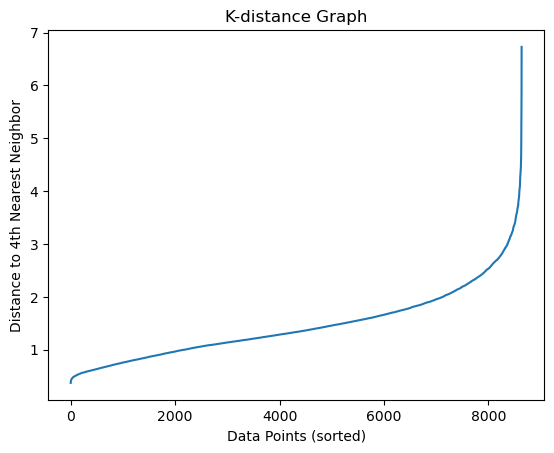

Optimal eps value: 3.734961363932208


In [42]:
k_distancePlot(df_normalized,n_neighbors=10)

In [43]:
DBSCANClusters=DBSCANPlt(df_normalized,eps=2.820054546540241,min_samples=10)

In [44]:
silhouette_score(df_normalized,DBSCANClusters.labels_)

0.32844263517446504

The t-SNE visualizations below demonstrate that the data can be effectively clustered into 7 groups. Additionally, the visualizations indicate that the Gaussian Mixture Model performed the best in clustering the data.

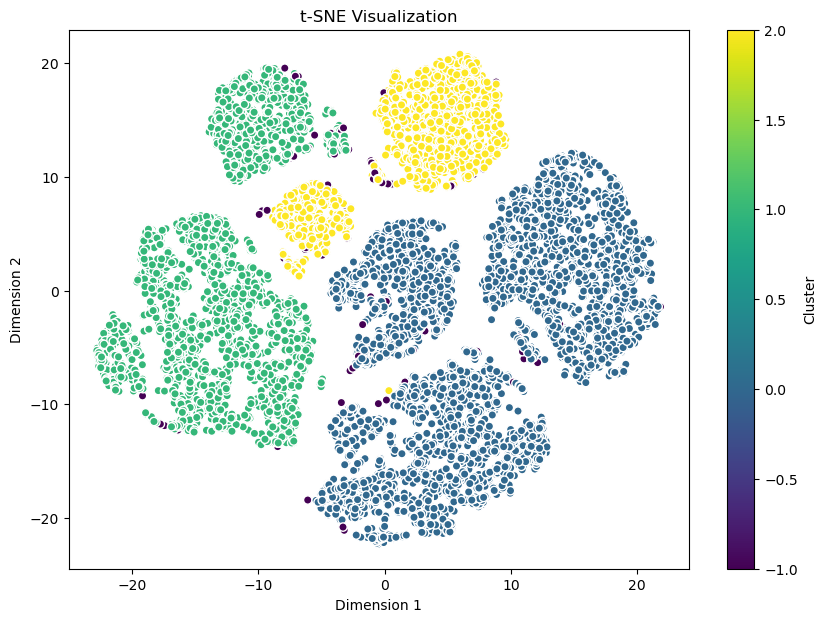

In [45]:
tsnePlt(df_tsne,DBSCANClusters.labels_) #DBSCAN visualization with tsne

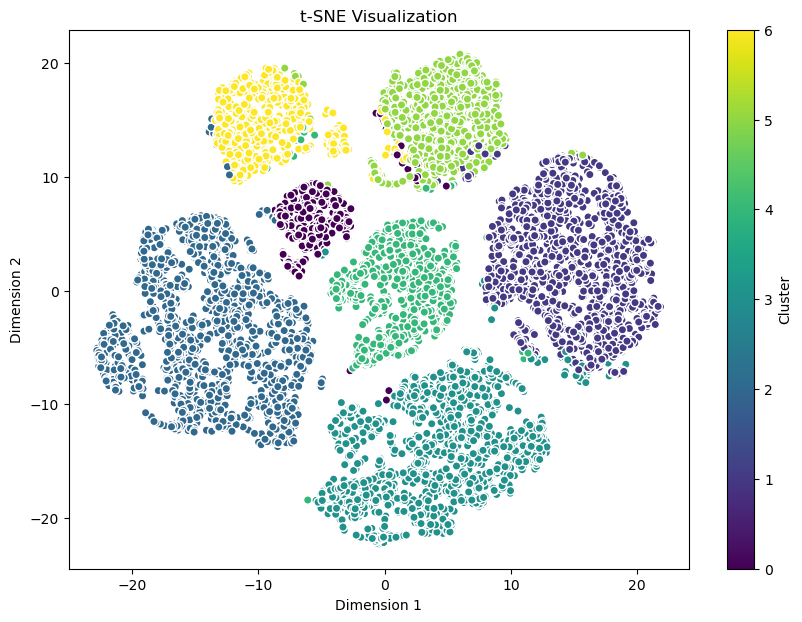

In [46]:
tsnePlt(df_tsne,kernelKmeansClassifier.labels_) #Kernel  KMeans visualization with tsne

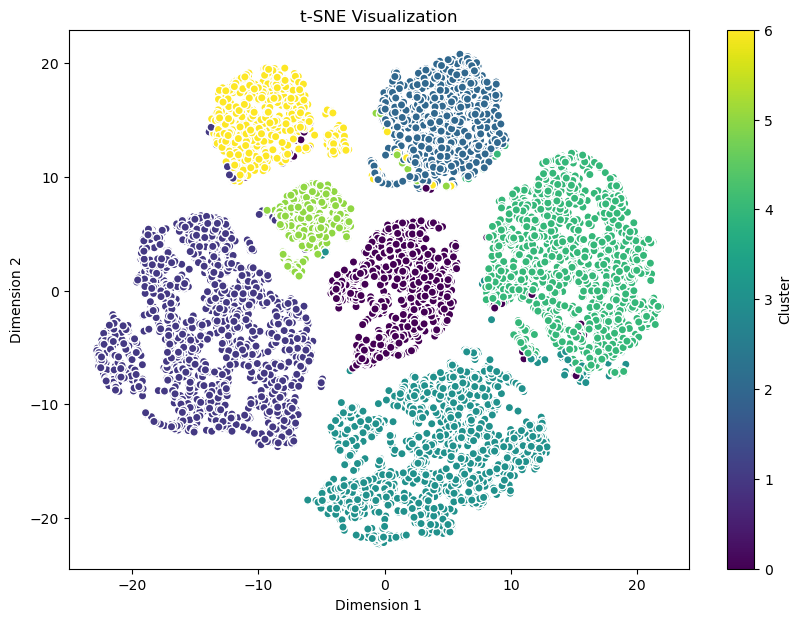

In [47]:
tsnePlt(df_tsne,KMeansClassifier.labels_) #KMeans visualization with tsne

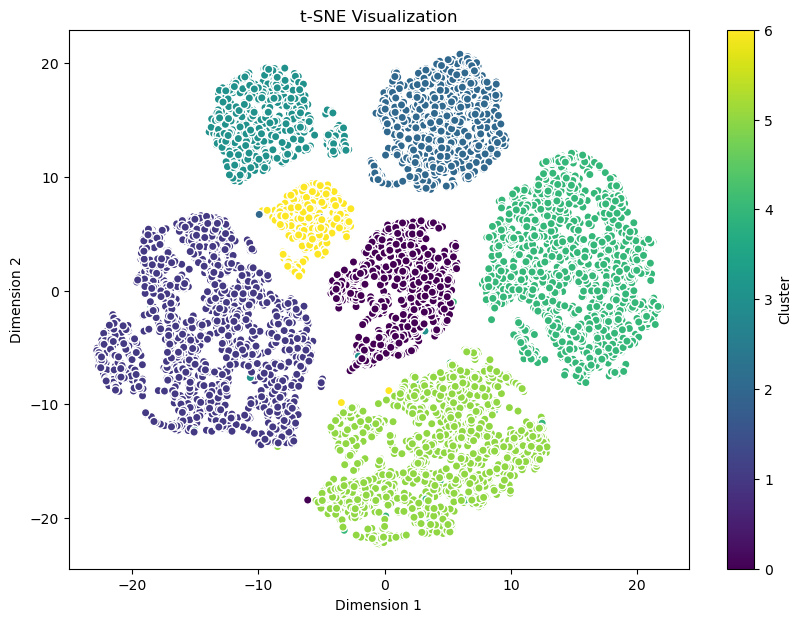

In [48]:
tsnePlt(df_tsne,GaussianMixtureModel.predict(df_normalized)) #Gausian Mixture visualization with tsne

In [203]:
# # Save variable to a file
# with open('GaussianMixtureModel.pkl', 'wb') as file:
#     pickle.dump(GaussianMixtureModel, file)

# # # Load variable from the file
# # with open('saved_variable.pkl', 'rb') as file:
# #     loaded_variable = pickle.load(file)

**Clusters Invistigation**

In this section the clusters resulting from the previous section are investigated to determine their distinctive features.

In [49]:
# np.unique(GaussianMixtureModel.predict(df_normalized))
#np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 0)
print(" Cluster one Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 0))
print(" Cluster two Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 1))
print(" Cluster three Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 2))
print(" Cluster four Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 3))
print(" Cluster five Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 4))
print(" Cluster six Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 5))
print(" Cluster seven Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 6))

 Cluster one Count =  1003
 Cluster two Count =  1962
 Cluster three Count =  1012
 Cluster four Count =  778
 Cluster five Count =  1746
 Cluster six Count =  1682
 Cluster seven Count =  453


From investigating each cluster it was deduced that the clusters distinct properties are:   
1. No purchase done in installment.
2. No one in the go purchase was done. 
3. No cash in advance given by the user.
4. No one in the go purchase was done or cash in advance given by the client.
5. No purchase done in installment and no cash in advance given by the client.
6. No purchases was made by the client.
7. No zero values in the client data.

In [50]:
cluster_one= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==0])
cluster_two= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==1])
cluster_three= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==2])
cluster_four= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==3])
cluster_five= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==4])
cluster_six= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==5])
cluster_seven= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==6])

In [51]:
cluster_one.describe() # INSTALLMENTS_PURCHASES +  CASH_ADVANCE

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.0,1003.0,1003.000000,1003.000000,1003.0,1003.0,1003.0,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,789.554436,0.791121,905.917936,905.917936,0.0,0.0,0.362812,0.362812,0.0,0.0,0.0,8.019940,4426.431312,1215.257410,497.152149,0.145077,11.608175
std,1198.649414,0.283281,1439.225229,1439.225229,0.0,0.0,0.314544,0.314544,0.0,0.0,0.0,14.174969,3611.028798,2182.842011,1646.626251,0.300607,1.189195
min,0.000000,0.000000,0.010000,0.010000,0.0,0.0,0.083333,0.083333,0.0,0.0,0.0,0.000000,150.000000,0.056466,0.055880,0.000000,6.000000
25%,54.122495,0.545455,159.205000,159.205000,0.0,0.0,0.083333,0.083333,0.0,0.0,0.0,1.000000,1600.000000,314.450184,123.273833,0.000000,12.000000
50%,287.493279,1.000000,456.700000,456.700000,0.0,0.0,0.250000,0.250000,0.0,0.0,0.0,4.000000,3000.000000,608.782428,193.086366,0.000000,12.000000
75%,1111.850419,1.000000,1030.600000,1030.600000,0.0,0.0,0.563492,0.563492,0.0,0.0,0.0,11.000000,6500.000000,1379.589837,417.018444,0.090909,12.000000
max,12323.845360,1.000000,17945.000000,17945.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,217.000000,25000.000000,50721.483360,30528.432400,1.000000,12.000000


In [52]:
cluster_two.describe() #PURCHASES = 0 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1962.000000,1962.000000,1962.0,1962.0,1962.0,1962.000000,1962.0,1962.0,1962.0,1962.000000,1962.000000,1962.0,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000
mean,2208.719837,0.903538,0.0,0.0,0.0,2010.280003,0.0,0.0,0.0,0.277159,6.416922,0.0,4050.722052,1714.954091,1005.850808,0.046007,11.358308
std,2117.512664,0.198349,0.0,0.0,0.0,2501.024548,0.0,0.0,0.0,0.202334,8.187407,0.0,3277.232505,2750.937845,2618.769477,0.140612,1.499126
min,0.001146,0.090909,0.0,0.0,0.0,18.042768,0.0,0.0,0.0,0.083333,1.000000,0.0,50.000000,0.049513,0.117036,0.000000,6.000000
25%,827.768723,0.909091,0.0,0.0,0.0,380.989479,0.0,0.0,0.0,0.100000,2.000000,0.0,1500.000000,395.410669,267.130336,0.000000,12.000000
50%,1508.655243,1.000000,0.0,0.0,0.0,1223.386820,0.0,0.0,0.0,0.250000,4.000000,0.0,3000.000000,803.791637,487.876487,0.000000,12.000000
75%,2877.995388,1.000000,0.0,0.0,0.0,2715.454494,0.0,0.0,0.0,0.363636,8.000000,0.0,6000.000000,1778.707091,1009.831840,0.000000,12.000000
max,14581.459140,1.000000,0.0,0.0,0.0,26194.049540,0.0,0.0,0.0,1.500000,123.000000,0.0,19000.000000,34107.074990,61031.618600,1.000000,12.000000


In [53]:
cluster_three.describe() # None = 0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,2828.066770,0.970120,1927.788251,1157.447460,771.059792,2086.784103,0.777264,0.394645,0.628127,0.291813,7.746047,30.385375,5812.263944,3033.088475,1246.123343,0.069474,11.625494
std,2618.066475,0.089857,2537.876393,1938.789772,1036.915424,3107.866549,0.247892,0.289648,0.309580,0.213305,9.740842,29.763753,4146.831737,4084.360799,1770.975100,0.176262,1.175526
min,2.299436,0.181818,0.000000,0.000000,0.000000,14.222216,0.000000,0.000000,0.000000,0.083333,1.000000,0.000000,300.000000,48.594194,27.398111,0.000000,6.000000
25%,894.763339,1.000000,598.770000,225.120000,183.000000,399.128295,0.583333,0.166667,0.363636,0.083333,2.000000,11.000000,2500.000000,885.728119,336.201755,0.000000,12.000000
50%,1994.252772,1.000000,1227.040000,610.470000,446.615000,1116.127769,0.857143,0.333333,0.666667,0.250000,4.000000,21.000000,5000.000000,1758.747511,749.080720,0.000000,12.000000
75%,4005.732719,1.000000,2385.972500,1394.737500,1012.895000,2646.855311,1.000000,0.583333,0.916667,0.416667,10.000000,39.000000,8000.000000,3551.298659,1459.563178,0.083333,12.000000
max,16259.448570,1.000000,49039.570000,40761.250000,13184.430000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,308.000000,30000.000000,46930.598240,22011.779800,1.000000,12.000000


In [54]:
cluster_four.describe() # INSTALLMENTS_PURCHASES =0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,778.000000,778.000000,778.000000,778.000000,778.0,778.000000,778.000000,778.000000,778.0,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.00000,778.000000
mean,2368.080402,0.933470,664.628728,664.628728,0.0,2048.585635,0.276917,0.276917,0.0,0.296183,6.907455,6.370180,4655.172938,1975.408588,1025.658996,0.06010,11.345758
std,2285.450546,0.151786,1520.295890,1520.295890,0.0,2503.700540,0.253774,0.253774,0.0,0.213040,7.804343,13.692307,3538.162364,2931.872549,1682.212317,0.16835,1.514406
min,1.599053,0.181818,0.000000,0.000000,0.0,18.280043,0.000000,0.000000,0.0,0.083333,1.000000,1.000000,200.000000,28.654864,3.197940,0.00000,6.000000
25%,853.157402,1.000000,110.385000,110.385000,0.0,365.839187,0.083333,0.083333,0.0,0.142857,2.000000,1.000000,1962.500000,515.663243,263.711073,0.00000,12.000000
50%,1612.065247,1.000000,285.570000,285.570000,0.0,1159.728594,0.166667,0.166667,0.0,0.250000,5.000000,3.000000,3300.000000,1136.466368,544.259473,0.00000,12.000000
75%,3154.941241,1.000000,719.430000,719.430000,0.0,2776.214456,0.333333,0.333333,0.0,0.416667,9.000000,7.000000,6500.000000,2249.137822,1161.041879,0.00000,12.000000
max,15258.225900,1.000000,22101.780000,22101.780000,0.0,20277.331120,1.000000,1.000000,0.0,1.250000,93.000000,309.000000,20000.000000,39461.965800,19060.534750,1.00000,12.000000


In [55]:
cluster_five.describe() # CASH_ADVANCE = 0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.0,1746.000000,1746.000000,1746.000000,1746.0,1746.0,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,1218.684607,0.936618,2464.667073,1504.510395,961.278671,0.0,0.811967,0.457907,0.646716,0.0,0.0,34.523482,5704.182026,2309.004938,611.928829,0.260053,11.802405
std,1816.061882,0.150645,3499.361920,2782.481781,1342.276786,0.0,0.238833,0.333590,0.313220,0.0,0.0,36.568964,4013.341531,3311.911627,1621.029814,0.358964,0.843254
min,0.704307,0.166667,34.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.0,0.0,0.000000,300.000000,18.125527,13.545097,0.000000,6.000000
25%,166.576153,1.000000,727.535000,257.435000,229.140000,0.0,0.666667,0.166667,0.416667,0.0,0.0,13.000000,2500.000000,699.198885,169.809316,0.000000,12.000000
50%,535.003746,1.000000,1521.520000,759.340000,544.865000,0.0,0.916667,0.333333,0.666667,0.0,0.0,24.000000,5000.000000,1344.258014,212.726218,0.000000,12.000000
75%,1518.695356,1.000000,2841.732500,1734.092500,1172.702500,0.0,1.000000,0.750000,1.000000,0.0,0.0,42.000000,7500.000000,2601.725507,549.154752,0.500000,12.000000
max,19043.138560,1.000000,41050.400000,40624.060000,15497.190000,0.0,1.000000,1.000000,1.000000,0.0,0.0,358.000000,30000.000000,36066.750680,29019.802880,1.000000,12.000000


In [56]:
cluster_six.describe() #cash Advance = 0 , ONEOFF_PURCHASES=0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1682.000000,1682.000000,1682.000000,1682.0,1682.000000,1682.0,1682.000000,1682.0,1682.000000,1682.0,1682.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,417.062700,0.824279,553.446088,0.0,553.446088,0.0,0.715356,0.0,0.680855,0.0,0.0,12.011891,3103.812951,768.124763,717.821141,0.325338,11.508918
std,937.525092,0.257182,903.542386,0.0,903.542386,0.0,0.299014,0.0,0.302505,0.0,0.0,12.267390,2714.751340,1173.710140,3355.552496,0.371401,1.369847
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.0,0.0,0.000000,300.000000,4.841543,0.019163,0.000000,6.000000
25%,21.723607,0.636364,166.777500,0.0,166.777500,0.0,0.500000,0.0,0.416667,0.0,0.0,6.000000,1262.500000,229.267357,117.359998,0.000000,12.000000
50%,62.849886,1.000000,337.500000,0.0,337.500000,0.0,0.833333,0.0,0.750000,0.0,0.0,10.000000,2500.000000,442.807927,164.367894,0.166667,12.000000
75%,339.378323,1.000000,623.757500,0.0,623.757500,0.0,1.000000,0.0,1.000000,0.0,0.0,12.000000,4000.000000,885.039304,215.266274,0.666667,12.000000
max,11670.179850,1.000000,22500.000000,0.0,22500.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,199.000000,23000.000000,23150.571840,76406.207520,1.000000,12.000000


In [57]:
cluster_seven.describe() #ONEOFF_PURCHASES = 0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,453.000000,453.000000,453.000000,453.0,453.000000,453.000000,453.000000,453.0,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,2580.692816,0.956986,540.404768,0.0,540.404768,2066.016150,0.654742,0.0,0.607290,0.262292,6.216336,12.350993,4374.613687,1980.679612,1450.711212,0.047754,11.315673
std,2598.649321,0.125165,852.588699,0.0,852.588699,2559.811535,0.314586,0.0,0.315427,0.195549,8.998869,19.642332,3616.497675,3092.035176,2538.967025,0.129108,1.623840
min,1.097736,0.181818,4.440000,0.0,4.440000,18.531069,0.083333,0.0,0.083333,0.083333,1.000000,1.000000,500.000000,32.924384,9.801394,0.000000,6.000000
25%,882.715792,1.000000,159.960000,0.0,159.960000,493.377807,0.363636,0.0,0.333333,0.083333,2.000000,5.000000,1500.000000,593.859264,355.119488,0.000000,12.000000
50%,1648.217916,1.000000,339.960000,0.0,339.960000,1136.000468,0.750000,0.0,0.666667,0.166667,4.000000,9.000000,3000.000000,1145.269760,816.929180,0.000000,12.000000
75%,3347.229846,1.000000,649.500000,0.0,649.500000,2683.566903,1.000000,0.0,0.909091,0.333333,7.000000,13.000000,6000.000000,2069.375056,1592.560164,0.000000,12.000000
max,16304.889250,1.000000,14686.100000,0.0,14686.100000,19862.878440,1.000000,0.0,1.000000,1.000000,123.000000,347.000000,19000.000000,40627.595240,31871.363790,1.000000,12.000000


In [179]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
# cluster_one['INSTALLMENTS_PURCHASES'].plot(kind='hist', ax=axes[0], title="Cluster_one_INSTALLMENTS_PURCHASES")
# cluster_one['CASH_ADVANCE'].plot(kind='hist', ax=axes[1], title="Cluster_one_CASH_ADVANCE")


To validate the accuracy of the insights derived for each cluster, a thorough examination of the original data was conducted using the identified insights. The results demonstrated that, based on the insights, only 30 points out of 8363 were misclassified. This outcome confirms the validity of the insights.

In [82]:
cash_only_zero_values_count = ((df_copy['CASH_ADVANCE'] == 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] != 0) & (df_copy['ONEOFF_PURCHASES'] != 0)).sum()
print("cash_only_zero_values_count = ",cash_only_zero_values_count)
installment_only_zero_values_count = ((df_copy['CASH_ADVANCE'] != 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0) & (df_copy['ONEOFF_PURCHASES'] != 0)).sum()
print("installment_only_zero_values_count = ",installment_only_zero_values_count)
one_off_only_zero_values_count = ((df_copy['CASH_ADVANCE'] != 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] != 0) & (df_copy['ONEOFF_PURCHASES'] == 0)).sum()
print("one_off_only_zero_values_count = ",one_off_only_zero_values_count)
one_off_cash_advance_zero_values_count = ((df_copy['CASH_ADVANCE'] == 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] != 0) & (df_copy['ONEOFF_PURCHASES'] == 0)).sum()
print("one_off_cash_advance_zero_values_count = ",one_off_cash_advance_zero_values_count)
installment_cash_advance_zero_values_count = ((df_copy['CASH_ADVANCE'] == 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0) & (df_copy['ONEOFF_PURCHASES'] != 0)).sum()
print("installment_cash_advance_zero_values_count = ",installment_cash_advance_zero_values_count)
purchases_zero_values_count = ((df_copy['CASH_ADVANCE'] != 0) & (df_copy['PURCHASES'] == 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0) & (df_copy['ONEOFF_PURCHASES'] == 0)).sum()
print("purchases_zero_values_count = ",purchases_zero_values_count)
total = cash_only_zero_values_count +installment_only_zero_values_count+one_off_only_zero_values_count+one_off_cash_advance_zero_values_count+installment_cash_advance_zero_values_count+purchases_zero_values_count
noneCount = len(df_copy) -total
print("Others Count = ",noneCount)

cash_only_zero_values_count =  1733
installment_only_zero_values_count =  777
one_off_only_zero_values_count =  454
one_off_cash_advance_zero_values_count =  1692
installment_cash_advance_zero_values_count =  1005
purchases_zero_values_count =  1964
Others Count =  1011


In [83]:
cluster_one_miss_class = abs(installment_cash_advance_zero_values_count - len(cluster_one))
cluster_one_miss_class

2

In [84]:
cluster_two_miss_class = abs(purchases_zero_values_count - len(cluster_two))
cluster_one_miss_class

2

In [85]:
cluster_three_miss_class = abs(noneCount - len(cluster_three))
cluster_three_miss_class

1

In [86]:
cluster_four_miss_class= abs(installment_only_zero_values_count - len(cluster_four))
cluster_four_miss_class

1

In [87]:
cluster_five_miss_class = abs(cash_only_zero_values_count - len(cluster_five))
cluster_five_miss_class

13

In [88]:
cluster_six_miss_class = abs(one_off_cash_advance_zero_values_count - len(cluster_six))
cluster_six_miss_class

10

In [89]:
cluster_seven_miss_class = abs(one_off_only_zero_values_count - len(cluster_seven))
cluster_seven_miss_class

1

In [90]:
totalMissclassified = cluster_one_miss_class+cluster_two_miss_class+cluster_three_miss_class+cluster_four_miss_class+cluster_five_miss_class+cluster_six_miss_class+cluster_seven_miss_class
totalMissclassified

30

Using PCA

In this section PCA was utilized to investigate its effect on clustring our data.

In [91]:
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized),columns=['1', '2','3','4','5'])
print(pca.explained_variance_ratio_.sum())
df_pca.info()
df_pca_normalized= df_pca
df_pca_normalized=preprocessing.normalize(df_pca, norm='l2')


0.9417142880926612
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       8636 non-null   float64
 1   2       8636 non-null   float64
 2   3       8636 non-null   float64
 3   4       8636 non-null   float64
 4   5       8636 non-null   float64
dtypes: float64(5)
memory usage: 337.5 KB


After applying PCA some features were skwed to the right, which required applying log transform.

In [92]:
df_pca_normalized=pd.DataFrame(df_pca_normalized)
df_pca_normalized.skew()

0   -0.329873
1    0.043675
2   -0.305744
3   -0.104961
4    1.505594
dtype: float64

In [93]:
df_pca_normalized[4]=transformer.transform(df_pca_normalized[4].values.reshape((-1,1)))
df_pca_normalized.skew()

0   -0.329873
1    0.043675
2   -0.305744
3   -0.104961
4    0.900885
dtype: float64

Two clustering methods were utilized on PCA which were gausian mixture method and Kmeans as they were the ones producing the best results in previous analysis.

In [94]:
tsne = TSNE(init='pca',n_components=2, perplexity=35,learning_rate=0.1,n_iter=5000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca_normalized), columns=['Dimension 1', 'Dimension 2'])

In [95]:
GaussianMixtureModel=GaussianMixturePlt(df_pca_normalized,n_components=7)

In [96]:
silhouette_score(df_pca_normalized,GaussianMixtureModel.predict(df_pca_normalized))

0.5088319742128333

In [97]:
KmeansModel=kmeansPlt(df_pca_normalized,n_clusters=7)

In [98]:
silhouette_score(df_pca_normalized,KmeansModel.labels_)

0.5180342179055551

Once again, the T-SNE plot has confirmed the presence of 7 distinct clusters, with the Gaussian Mixture Model emerging as the most effective technique out of the analysed models for clustering the data.

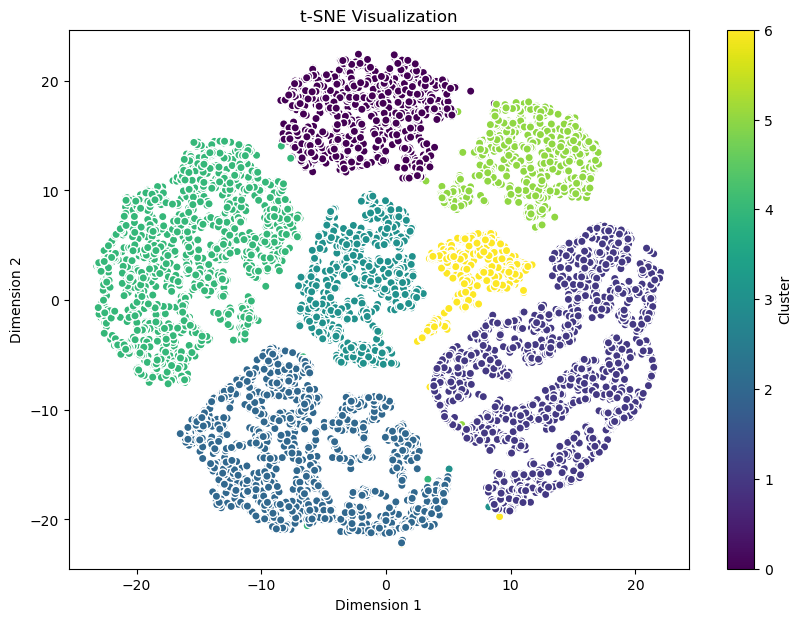

In [99]:
tsnePlt(df_tsne,GaussianMixtureModel.predict(df_pca_normalized))

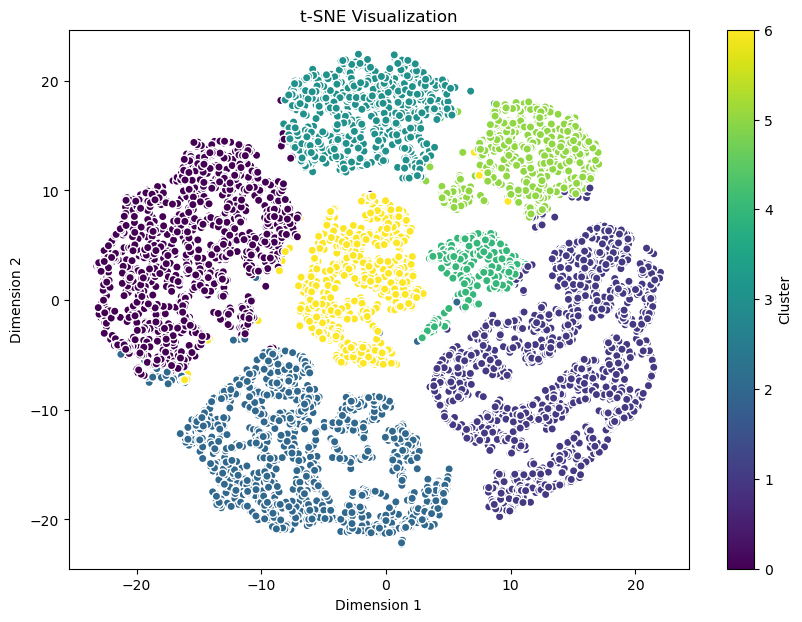

In [100]:
tsnePlt(df_tsne,KmeansModel.labels_) 

**PCA Cluster Investigation**

In [101]:
print(" Cluster one Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 0))
print(" Cluster two Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 1))
print(" Cluster three Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 2))
print(" Cluster four Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 3))
print(" Cluster five Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 4))
print(" Cluster six Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 5))
print(" Cluster seven Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 6))

 Cluster one Count =  985
 Cluster two Count =  1967
 Cluster three Count =  1694
 Cluster four Count =  1008
 Cluster five Count =  1733
 Cluster six Count =  782
 Cluster seven Count =  467


In [102]:
cluster_one= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==0])
cluster_two= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==1])
cluster_three= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==2])
cluster_four= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==3])
cluster_five= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==4])
cluster_six= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==5])
cluster_seven= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==6])

In [103]:
cluster_one.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2843.764846,0.970931,1972.275056,1185.416041,786.881574,2122.149967,0.785622,0.400855,0.635939,0.294305,7.859898,30.965482,5865.950367,3090.973498,1256.924978,0.070794,11.626396
std,2594.334490,0.089085,2557.480882,1957.512180,1045.229639,3137.791911,0.241664,0.290015,0.306006,0.214026,9.832265,29.916327,4137.387449,4121.359746,1781.568321,0.178300,1.170658
min,2.299436,0.181818,83.000000,25.520000,22.490000,18.561424,0.083333,0.083333,0.083333,0.083333,1.000000,2.000000,300.000000,48.594194,27.398111,0.000000,6.000000
25%,909.560162,1.000000,636.840000,232.000000,191.340000,418.482499,0.583333,0.166667,0.416667,0.090909,2.000000,12.000000,2500.000000,932.414285,342.286490,0.000000,12.000000
50%,2041.480046,1.000000,1283.400000,640.170000,452.860000,1168.493188,0.888889,0.333333,0.666667,0.250000,5.000000,22.000000,5000.000000,1793.043228,759.107707,0.000000,12.000000
75%,4037.543707,1.000000,2435.090000,1424.870000,1029.980000,2671.441618,1.000000,0.583333,0.916667,0.416667,10.000000,39.000000,8000.000000,3620.440772,1480.266330,0.083333,12.000000
max,16259.448570,1.000000,49039.570000,40761.250000,13184.430000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,308.000000,30000.000000,46930.598240,22011.779800,1.000000,12.000000


In [117]:
missClusteringInCluster1 = abs(noneCount -len(cluster_one))
missClusteringInCluster1

26

In [105]:
cluster_two.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.0,1967.000000,1967.000000,1967.000000,1967.0,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,2207.538801,0.903413,0.000036,0.000036,0.0,2012.261313,0.000131,0.000131,0.0,0.276982,6.418404,0.003050,4050.338926,1714.321470,1004.931375,0.046123,11.358922
std,2117.080544,0.198400,0.001171,0.001171,0.0,2501.283216,0.003354,0.003354,0.0,0.202155,8.179343,0.063717,3279.607234,2748.274718,2615.733552,0.140606,1.497472
min,0.001146,0.090909,0.000000,0.000000,0.0,18.042768,0.000000,0.000000,0.0,0.083333,1.000000,0.000000,50.000000,0.049513,0.117036,0.000000,6.000000
25%,828.537027,0.909091,0.000000,0.000000,0.0,381.126213,0.000000,0.000000,0.0,0.100000,2.000000,0.000000,1500.000000,395.436088,266.946686,0.000000,12.000000
50%,1502.444690,1.000000,0.000000,0.000000,0.0,1224.607415,0.000000,0.000000,0.0,0.250000,4.000000,0.000000,3000.000000,804.570403,487.840515,0.000000,12.000000
75%,2877.462406,1.000000,0.000000,0.000000,0.0,2717.719705,0.000000,0.000000,0.0,0.363636,8.000000,0.000000,6000.000000,1778.139329,1008.882331,0.000000,12.000000
max,14581.459140,1.000000,0.050000,0.050000,0.0,26194.049540,0.090909,0.090909,0.0,1.500000,123.000000,2.000000,19000.000000,34107.074990,61031.618600,1.000000,12.000000


In [118]:
missClusteringInCluster2 = abs(purchases_installment_one_off_zero_values_count -len(cluster_two))
missClusteringInCluster2

3

In [107]:
cluster_three.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.0,1694.000000,1694.000000,1694.000000,1694.0,1694.0,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,418.241559,0.823807,555.951718,0.000024,557.010767,0.0,0.715723,0.000148,0.681096,0.0,0.0,12.091499,3109.216874,770.664876,714.896884,0.325395,11.505903
std,936.852594,0.257400,908.858247,0.000595,910.911544,0.0,0.298641,0.003505,0.302277,0.0,0.0,12.388113,2719.095276,1176.809033,3343.958982,0.371720,1.373842
min,0.000000,0.000000,4.800000,0.000000,4.800000,0.0,0.083333,0.000000,0.083333,0.0,0.0,0.000000,300.000000,4.841543,0.019163,0.000000,6.000000
25%,21.845404,0.636364,167.760000,0.000000,167.760000,0.0,0.500000,0.000000,0.416667,0.0,0.0,6.000000,1212.500000,229.561587,116.657812,0.000000,12.000000
50%,62.849886,1.000000,339.720000,0.000000,339.875000,0.0,0.833333,0.000000,0.750000,0.0,0.0,10.000000,2500.000000,443.805390,164.305157,0.166667,12.000000
75%,340.776525,1.000000,623.757500,0.000000,624.630000,0.0,1.000000,0.000000,1.000000,0.0,0.0,12.000000,4000.000000,885.039304,215.266274,0.666667,12.000000
max,11670.179850,1.000000,22500.000000,0.020000,22500.000000,0.0,1.000000,0.083333,1.000000,0.0,0.0,199.000000,23000.000000,23150.571840,76406.207520,1.000000,12.000000


In [120]:
missClusteringInCluster3 = abs(one_off_cash_advance_zero_values_count -len(cluster_three))
missClusteringInCluster3

2

In [109]:
cluster_four.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,791.206192,0.791886,902.334266,902.364484,0.062966,0.032169,0.362794,0.361959,0.000594,0.000173,0.001984,8.006944,4419.058141,1211.260221,497.517290,0.144358,11.609127
std,1197.472917,0.282889,1436.598156,1436.606535,1.430734,0.727277,0.313861,0.314187,0.012236,0.003882,0.044521,14.145539,3606.525123,2178.222558,1642.853044,0.300033,1.186650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.056466,0.055880,0.000000,6.000000
25%,54.186429,0.545455,158.240000,158.240000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,1.000000,1600.000000,313.920149,123.724716,0.000000,12.000000
50%,288.171251,1.000000,453.445000,453.445000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,4.000000,3000.000000,608.230077,193.380914,0.000000,12.000000
75%,1117.173503,1.000000,1028.052500,1028.052500,0.000000,0.000000,0.547980,0.547980,0.000000,0.000000,0.000000,11.000000,6500.000000,1370.734085,417.384464,0.090909,12.000000
max,12323.845360,1.000000,17945.000000,17945.000000,36.790000,18.204577,1.000000,1.000000,0.333333,0.090909,1.000000,217.000000,25000.000000,50721.483360,30528.432400,1.000000,12.000000


In [122]:
missClusteringInCluster4 = abs(installment_cash_advance_zero_values_count -len(cluster_four))
missClusteringInCluster4

3

In [111]:
cluster_five.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,1223.570256,0.938188,2477.273826,1515.771016,961.531085,0.032954,0.813468,0.461294,0.647676,0.000144,0.001731,34.654357,5710.560772,2302.843947,613.133661,0.259459,11.807271
std,1820.589932,0.147771,3507.297304,2789.833746,1340.579022,0.792124,0.237764,0.332536,0.312779,0.003465,0.041582,36.631584,4012.982370,3257.482141,1626.476457,0.358528,0.830853
min,0.704307,0.166667,34.000000,1.400000,1.950000,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,2.000000,300.000000,18.125527,13.545097,0.000000,6.000000
25%,168.909599,1.000000,740.110000,265.920000,229.130000,0.000000,0.666667,0.166667,0.416667,0.000000,0.000000,13.000000,2500.000000,707.157146,169.879335,0.000000,12.000000
50%,535.291589,1.000000,1534.120000,769.410000,545.050000,0.000000,0.916667,0.363636,0.666667,0.000000,0.000000,24.000000,5000.000000,1350.435597,212.770698,0.000000,12.000000
75%,1518.813947,1.000000,2855.040000,1744.630000,1174.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.000000,42.000000,7500.000000,2605.175646,548.880214,0.500000,12.000000
max,19043.138560,1.000000,41050.400000,40624.060000,15497.190000,19.841346,1.000000,1.000000,1.000000,0.083333,1.000000,358.000000,30000.000000,36066.750680,29019.802880,1.000000,12.000000


In [123]:
missClusteringInCluster5 = abs(cash_only_zero_values_count -len(cluster_five))
missClusteringInCluster5

0

In [113]:
cluster_six.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,2363.519817,0.933732,664.438542,664.655230,0.192097,2028.013286,0.279594,0.278368,0.001598,0.296324,6.887468,6.387468,4640.632411,1966.693935,1022.462753,0.059313,11.338875
std,2279.540173,0.151103,1516.125380,1516.110555,1.991153,2493.508002,0.253722,0.253157,0.020812,0.213070,7.791957,13.656458,3522.198924,2927.829618,1678.116991,0.167686,1.527888
min,1.599053,0.181818,1.000000,1.000000,0.000000,18.280043,0.083333,0.083333,0.000000,0.083333,1.000000,1.000000,200.000000,28.654864,3.197940,0.000000,6.000000
25%,853.157402,1.000000,113.385000,113.385000,0.000000,364.113518,0.083333,0.083333,0.000000,0.142857,2.000000,1.000000,1950.000000,510.539829,262.346142,0.000000,12.000000
50%,1618.593321,1.000000,289.000000,289.000000,0.000000,1148.230358,0.166667,0.166667,0.000000,0.250000,4.000000,3.000000,3300.000000,1118.962344,544.769899,0.000000,12.000000
75%,3142.598548,1.000000,715.480000,715.480000,0.000000,2746.433534,0.333333,0.333333,0.000000,0.416667,9.000000,7.000000,6500.000000,2246.701196,1156.390956,0.000000,12.000000
max,15258.225900,1.000000,22101.780000,22101.780000,29.860000,20277.331120,1.000000,1.000000,0.500000,1.250000,93.000000,309.000000,20000.000000,39461.965800,19060.534750,1.000000,12.000000


In [124]:
missClusteringInCluster6 = abs(installment_only_zero_values_count -len(cluster_six))
missClusteringInCluster6

5

In [115]:
cluster_seven.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,2591.186694,0.955745,533.007088,0.254711,533.625482,2036.976812,0.648497,0.001963,0.601040,0.260139,6.126338,12.237687,4413.276231,2010.350784,1444.768976,0.048254,11.336188
std,2669.643396,0.128051,843.288123,2.390296,843.181675,2536.981534,0.315687,0.013779,0.316153,0.195085,8.893691,19.390200,3695.297060,3299.994246,2516.728673,0.129298,1.603522
min,1.097736,0.181818,0.000000,0.000000,4.440000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,500.000000,32.924384,9.801394,0.000000,6.000000
25%,876.424195,1.000000,158.220000,0.000000,156.495000,466.970249,0.333333,0.000000,0.333333,0.083333,2.000000,5.000000,1500.000000,576.102146,349.328504,0.000000,12.000000
50%,1628.591333,1.000000,335.680000,0.000000,335.990000,1113.924335,0.666667,0.000000,0.666667,0.166667,4.000000,9.000000,3000.000000,1133.806322,798.909471,0.000000,12.000000
75%,3345.264609,1.000000,628.150000,0.000000,628.150000,2683.188586,1.000000,0.000000,0.909091,0.333333,7.000000,13.000000,6000.000000,2069.095864,1592.396401,0.000000,12.000000
max,16304.889250,1.000000,14686.100000,33.600000,14686.100000,19862.878440,1.000000,0.166667,1.000000,1.000000,123.000000,347.000000,19000.000000,40627.595240,31871.363790,1.000000,12.000000


In [126]:
missClusteringInCluster7 = abs(one_off_only_zero_values_count -len(cluster_seven))
missClusteringInCluster7

13

In [130]:
totalMissPCA = missClusteringInCluster1+missClusteringInCluster2+missClusteringInCluster3+missClusteringInCluster4+missClusteringInCluster5+missClusteringInCluster6+missClusteringInCluster7
print("total missclassified points using PCA = ", totalMissPCA, "points")

total missclassified points using PCA =  52 points


Despite the computational advantages of using PCA for facilitating the clustering process, it was observed that this approach led to a higher number of misclassifications. This discrepancy might result from the loss of certain feature interactions due to the selection of a specific number of principal components.

## 5. <a name="5">Further Analysis</a>
(<a href="#0">Go to top</a>)


### *Number of clusters*
If specific number of groups is desired, you can use dendrograms to get an initial idea for clustering.

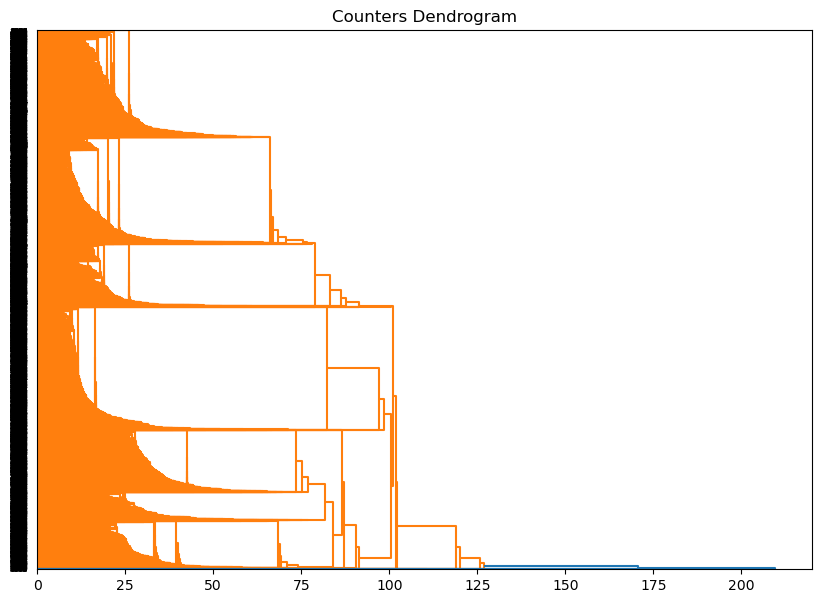

In [62]:

from sklearn.metrics.pairwise import pairwise_distances

# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

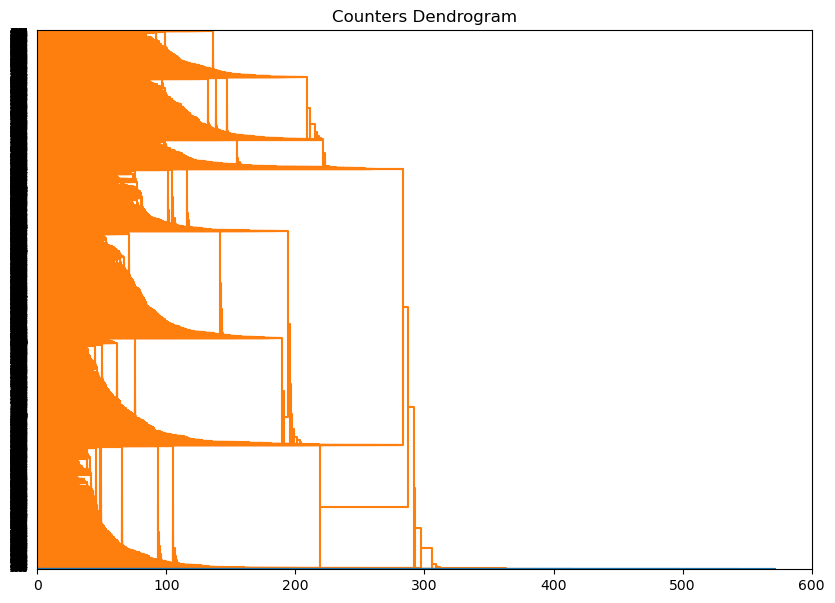

In [66]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='manhattan')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

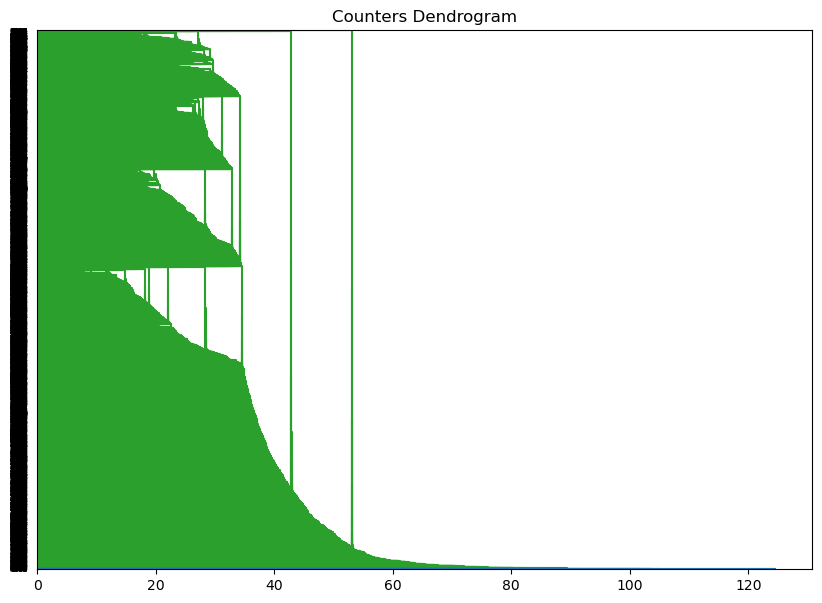

In [67]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='mahalanobis')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

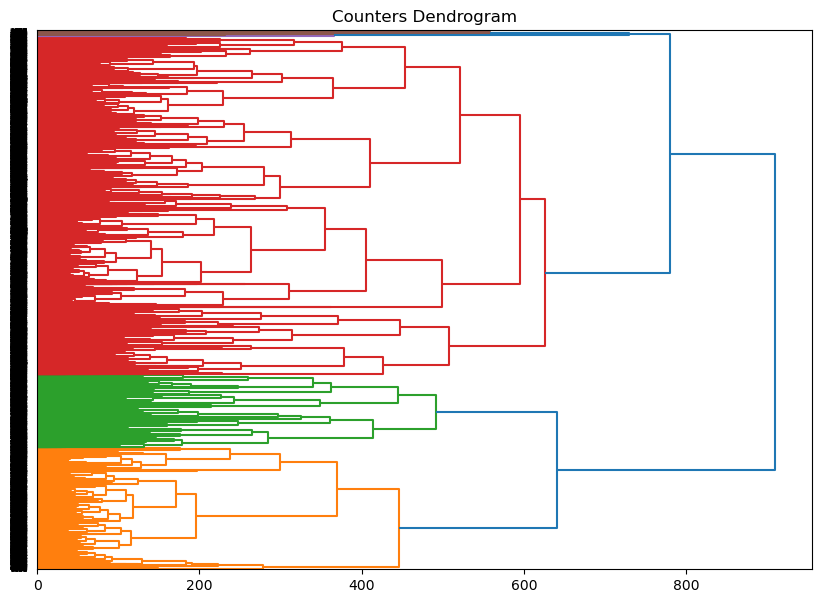

In [64]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

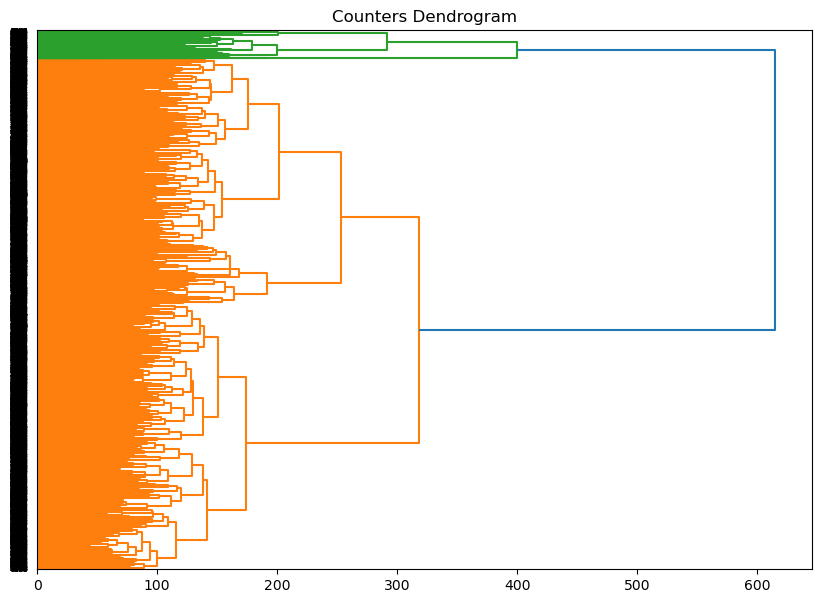

In [71]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='mahalanobis')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

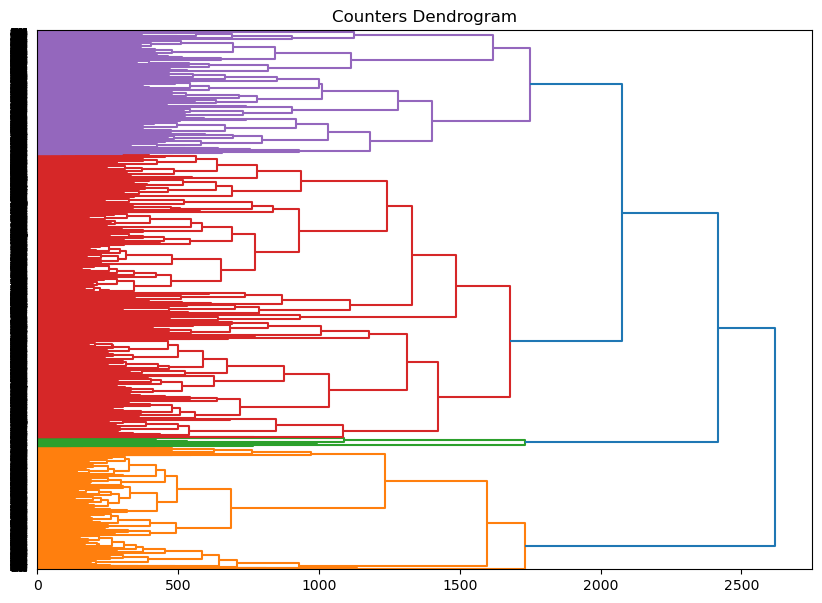

In [70]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='manhattan')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

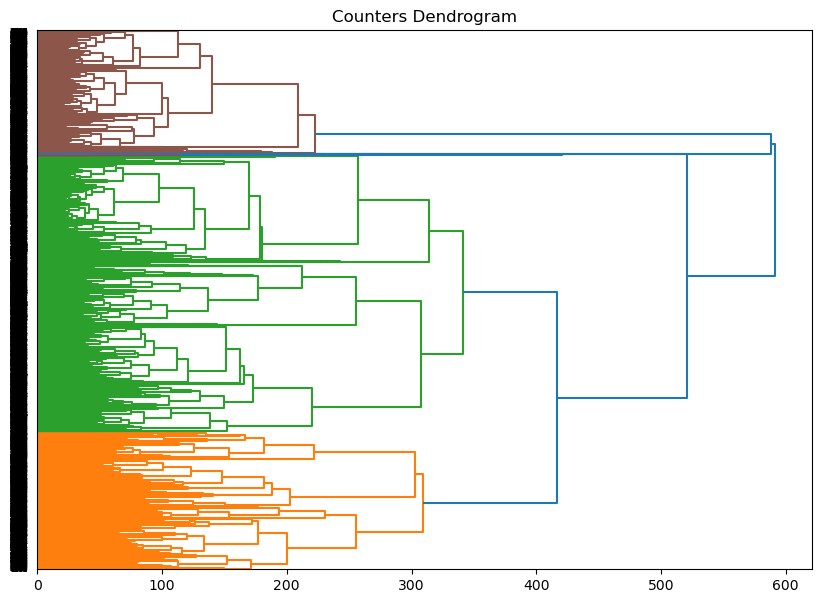

In [65]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

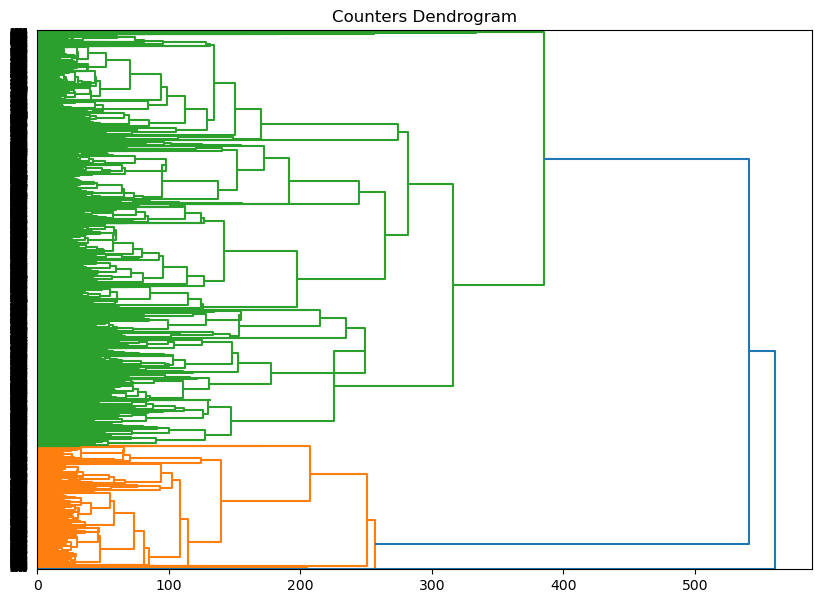

In [68]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='centroid')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()